# Parte 1: carga de datos y preparación

## Crear un archivo Python y agregar las dependencias necesarias

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
def plot_confusion_matrix(test_y, y_pred, printMode=True):
  cm = confusion_matrix(test_y, y_pred)
  if printMode:
    print(cm)
  sn.heatmap(cm, annot=True)


In [3]:
def load_data(path,printMode=True):
  df = pd.read_csv(path, header=0)
  if printMode:
    print(df.values)
  return df

## Leer el dataset desde el archivo CSV utilizando la librería Pandas. Y ver como esta compuesto.

In [4]:
df = load_data("./sample.csv")

[[2.7810836  2.550537   0.        ]
 [1.46548937 2.36212508 0.        ]
 [3.39656169 4.40029353 0.        ]
 [1.38807019 1.85022032 0.        ]
 [3.06407232 3.00530597 0.        ]
 [2.2810836  2.950537   0.        ]
 [1.86548937 2.86212508 0.        ]
 [3.89656169 4.00029353 0.        ]
 [1.08807019 1.15022032 0.        ]
 [3.96407232 3.00530597 0.        ]
 [7.62753121 2.75926224 1.        ]
 [5.33244125 2.08862677 1.        ]
 [6.92259672 1.77106367 1.        ]
 [8.37541865 0.52068655 1.        ]
 [7.67375647 3.50856301 1.        ]
 [6.62753121 2.99262235 1.        ]
 [6.33244125 1.08862678 1.        ]
 [5.92259672 1.88106367 1.        ]
 [8.67541865 0.30206866 1.        ]
 [7.67375647 1.50856301 1.        ]]


## Graficar los datos utilizando la librería.

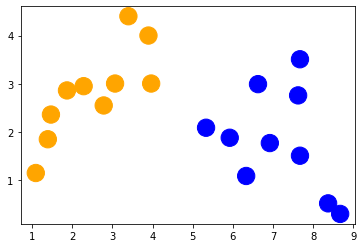

In [5]:
colors = ("orange", "blue")
plt.scatter(df['x'], df['y'], s=300, c=df['label'],
cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

## Obtener a partir del dataset los datos y las clases.

In [6]:
attributes = ['x', 'y']
labels = ['label']

In [7]:
X = df[attributes].values
y = df[labels].values

# Parte 2: entrenamiento y testing

## Dividir el conjunto de datos en 2, uno para entrenamiento y otro para prueba.

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25,
random_state=0, shuffle=True)

## Crear el un modelo de LDA y entrenarlo.

In [9]:
lda = LinearDiscriminantAnalysis()
lda = lda.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Parte 3: evaluación

## Predecir las clases para los datos del conjunto de prueba y ver los resultados.

In [10]:
y_pred = lda.predict(test_X)
print("Predicted vs Expected")
print(y_pred)
print(test_y)

Predicted vs Expected
[1 0 1 0 1]
[[1]
 [0]
 [1]
 [0]
 [1]]


## Probar el modelo y ver el reporte. Observar las columnas y que significan.

In [11]:
print(classification_report(test_y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         2
           1      1.000     1.000     1.000         3

    accuracy                          1.000         5
   macro avg      1.000     1.000     1.000         5
weighted avg      1.000     1.000     1.000         5



## Ver la matriz de confusión y analizar los resultados.

[[2 0]
 [0 3]]


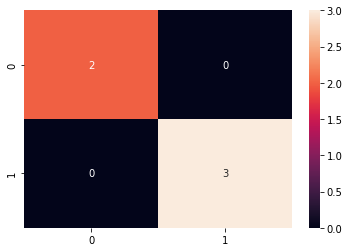

In [12]:
plot_confusion_matrix(test_y, y_pred)

# Parte 4 (opcional): Regresión Logística

In [13]:
lr = LogisticRegression()

In [14]:
lr = lr.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
y_pred = lr.predict(test_X)
print("Predicted vs Expected")
print(y_pred)
print(test_y)

Predicted vs Expected
[1 0 1 0 1]
[[1]
 [0]
 [1]
 [0]
 [1]]


In [16]:
print(classification_report(test_y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         2
           1      1.000     1.000     1.000         3

    accuracy                          1.000         5
   macro avg      1.000     1.000     1.000         5
weighted avg      1.000     1.000     1.000         5



[[2 0]
 [0 3]]


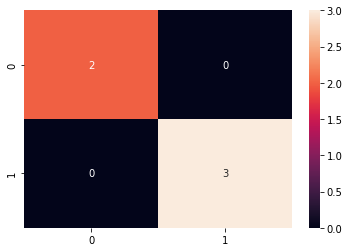

In [17]:
plot_confusion_matrix(test_y, y_pred)

# Ejercicio 2 - Dataset sport-training.csv

Realizar nuevamente el ejercicio del trabajo de aplicación 6 para la clasificación de deportistas utilizando scikit-learn. En cada paso comparar los resultados con los obtenidos utilizando RapidMiner.

In [18]:
df = load_data("./sports_Training.csv")

[[15.1 3 2 ... 29 4 'Futbol']
 [15.4 3 2 ... 18 8 'Rugby']
 [13.6 5 5 ... 27 28 'Voleibol']
 ...
 [17.0 5 1 ... 54 40 'Futbol']
 [17.3 5 1 ... 65 29 'Basketball']
 [15.5 1 1 ... 22 29 'Rugby']]


Eliminar filas cuyo valor para el atributo 'CapacidadDecision' estan fuera de los limites. Esto
se puede hacer de la siguiente forma utilizando la libreria Pandas

In [19]:
df = df[(df['CapacidadDecision'] >= 3) &
 (df['CapacidadDecision'] <= 100)]

Transformar atributos en string a numeros

In [20]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
attributes = ['Edad', 'Fuerza', 'Velocidad', 'Lesiones', 'Vision', 'Resistencia',
       'Agilidad', 'CapacidadDecision']
labels = ['DeportePrimario']

In [22]:
X = df[attributes].values
y = df[labels].values

print(df[labels].value_counts())

DeportePrimario
Futbol             156
Rugby              116
Voleibol           111
Basketball          99
dtype: int64


In [23]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25,
random_state=0, shuffle=True)

In [24]:
lr = LinearDiscriminantAnalysis()

In [25]:
lr = lr.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
y_pred = lr.predict(test_X)
print("Predicted vs Expected")
print(y_pred)
print(test_y)

Predicted vs Expected
['Futbol' 'Futbol' 'Rugby' 'Basketball' 'Futbol' 'Rugby' 'Voleibol'
 'Futbol' 'Basketball' 'Voleibol' 'Rugby' 'Rugby' 'Voleibol' 'Rugby'
 'Rugby' 'Futbol' 'Futbol' 'Futbol' 'Rugby' 'Futbol' 'Futbol' 'Futbol'
 'Futbol' 'Futbol' 'Futbol' 'Futbol' 'Voleibol' 'Rugby' 'Futbol' 'Futbol'
 'Futbol' 'Voleibol' 'Futbol' 'Rugby' 'Rugby' 'Rugby' 'Voleibol' 'Futbol'
 'Voleibol' 'Rugby' 'Voleibol' 'Basketball' 'Futbol' 'Futbol' 'Basketball'
 'Rugby' 'Rugby' 'Voleibol' 'Futbol' 'Futbol' 'Rugby' 'Voleibol' 'Futbol'
 'Futbol' 'Futbol' 'Voleibol' 'Futbol' 'Futbol' 'Rugby' 'Rugby' 'Futbol'
 'Rugby' 'Rugby' 'Futbol' 'Futbol' 'Rugby' 'Rugby' 'Futbol' 'Voleibol'
 'Futbol' 'Futbol' 'Futbol' 'Basketball' 'Futbol' 'Rugby' 'Voleibol'
 'Rugby' 'Futbol' 'Futbol' 'Futbol' 'Rugby' 'Voleibol' 'Futbol' 'Rugby'
 'Rugby' 'Rugby' 'Futbol' 'Rugby' 'Basketball' 'Voleibol' 'Rugby' 'Futbol'
 'Futbol' 'Rugby' 'Voleibol' 'Futbol' 'Futbol' 'Rugby' 'Rugby' 'Rugby'
 'Rugby' 'Rugby' 'Basketball' 'Voleibol' '

In [27]:
print(classification_report(test_y, y_pred, digits=3))

              precision    recall  f1-score   support

  Basketball      0.333     0.107     0.162        28
      Futbol      0.500     0.684     0.578        38
       Rugby      0.366     0.556     0.441        27
    Voleibol      0.263     0.179     0.213        28

    accuracy                          0.405       121
   macro avg      0.366     0.381     0.348       121
weighted avg      0.377     0.405     0.367       121



[[ 3  7 12  6]
 [ 1 26  6  5]
 [ 3  6 15  3]
 [ 2 13  8  5]]


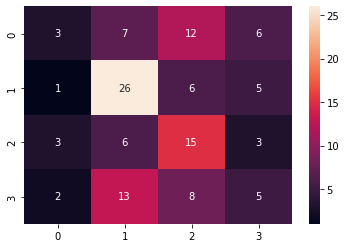

In [28]:
plot_confusion_matrix(test_y, y_pred)

Usar los datos del archivo sports_Scoring.csv para clasificar los nuevos individuos uilizando el
modelo entrenado anteriormente. Comparar los resultados con los obtenidos en el TA6.

In [29]:
df_test = load_data("./sports_Scoring.csv")

[[18.5  5.   1.  ...  5.  33.  61. ]
 [13.3  1.   2.  ...  5.  18.  59. ]
 [13.4  2.   1.  ...  5.  40.  11. ]
 ...
 [14.5  5.   4.  ...  3.  49.  15. ]
 [18.7  3.   4.  ...  5.  20.  54. ]
 [13.8  5.   6.  ...  6.  52.  15. ]]


In [30]:
df_test = df_test[(df_test['CapacidadDecision'] >= 3) &
 (df_test['CapacidadDecision'] <= 100)]

In [31]:
x_test = df_test[attributes].values

In [32]:
y_pred = lr.predict(x_test)
print("Predicted vs Expected")
print(y_pred)
print(df_test)

Predicted vs Expected
['Voleibol' 'Rugby' 'Futbol' ... 'Futbol' 'Basketball' 'Futbol']
      Edad  Fuerza  Velocidad  ...  Resistencia  Agilidad  CapacidadDecision
0     18.5       5          1  ...            5        33                 61
1     13.3       1          2  ...            5        18                 59
2     13.4       2          1  ...            5        40                 11
4     16.3       3          1  ...            5        32                 35
5     15.7       1          1  ...            3        43                 37
...    ...     ...        ...  ...          ...       ...                ...
1836  17.2       5          3  ...            5        36                 19
1837  17.9       5          1  ...            0        33                  4
1838  14.5       5          4  ...            3        49                 15
1839  18.7       3          4  ...            5        20                 54
1840  13.8       5          6  ...            6        52         

In [33]:
df_test["prediction(DeportePrimario)"] = y_pred

In [34]:
df_test.to_csv("output_python.csv")

In [35]:
output_rapidminer = load_data("./output_rapidminer.csv")
output_python = load_data("./output_python.csv")

[[1.4006538206943662 1.0267963599149224 -0.6533066011243682 ...
  -0.05433562881444607 1.6348457196702657 'Basketball']
 [-1.4607030430992456 -1.7113272665248709 0.011026271748934443 ...
  -1.2520386664011731 1.5321618993834443 'Rugby']
 [-1.4056769495647532 -1.0267963599149224 -0.6533066011243682 ...
  0.5045924553926933 -0.9322497875002712 'Futbol']
 ...
 [-0.8003899206853355 1.0267963599149224 1.3396920174955398 ...
  1.2232142779447297 -0.7268821469266282 'Futbol']
 [1.5107060077633507 -0.3422654533049741 1.3396920174955398 ...
  -1.0923449280562765 1.2754523486663902 'Basketball']
 [-1.185572575426783 1.0267963599149224 2.6683577632421454 ...
  1.4627548854620749 -0.7268821469266282 'Futbol']]
[[0 18.5 5 ... 33 61 'Voleibol']
 [1 13.3 1 ... 18 59 'Rugby']
 [2 13.4 2 ... 40 11 'Futbol']
 ...
 [1838 14.5 5 ... 49 15 'Futbol']
 [1839 18.7 3 ... 20 54 'Basketball']
 [1840 13.8 5 ... 52 15 'Futbol']]


In [36]:
print(output_python["prediction(DeportePrimario)"].head())

0    Voleibol
1       Rugby
2      Futbol
3       Rugby
4       Rugby
Name: prediction(DeportePrimario), dtype: object


In [37]:
print(output_rapidminer["prediction(DeportePrimario)"].head())

0    Basketball
1         Rugby
2        Futbol
3         Rugby
4        Futbol
Name: prediction(DeportePrimario), dtype: object


In [38]:
print(len(output_python["prediction(DeportePrimario)"]))
print(len(output_rapidminer["prediction(DeportePrimario)"]))
comparison = output_python["prediction(DeportePrimario)"] == output_rapidminer["prediction(DeportePrimario)"]
print(comparison)

1767
1767
0       False
1        True
2        True
3        True
4       False
        ...  
1762     True
1763     True
1764     True
1765     True
1766     True
Name: prediction(DeportePrimario), Length: 1767, dtype: bool


In [39]:
comparison.value_counts()

True     1486
False     281
Name: prediction(DeportePrimario), dtype: int64

Dado que hay una diferencia en el tratamiento de datos los resultados no son identicos, de todas formas son bastante similares